In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playeragg/player_agg.csv


In [2]:
df = pd.read_csv('/kaggle/input/playeragg/player_agg.csv')

In [3]:
df

,Unnamed: 0,hitting_player,shots_played,agg
0,1,Abedallah Shelbayh,724,4.983425
1,2,Adrian Andreev,739,5.257104
2,3,Adrian Mannarino,9211,4.964065
3,4,Albert Ramos,5219,4.924315
4,5,Alejandro Davidovich Fokina,14078,4.853317
...,...,...,...,...
314,315,Yuichi Sugita,223,5.161435
315,316,Zdenek Kolar,1296,4.948302
316,317,Zhizhen Zhang,828,5.079710
317,318,Zizou Bergs,893,5.091825


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:8

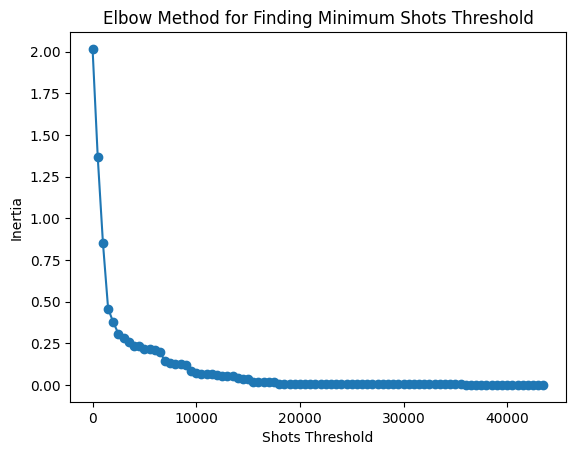

In [4]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

shots_thresholds = np.arange(0, df['shots_played'].max(), 500)  # Adjust the step if needed
inertia = []

for threshold in shots_thresholds:
    filtered_df = df[df['shots_played'] >= threshold]
    if len(filtered_df) >= 3:
        kmeans = KMeans(n_clusters=3, random_state=42).fit(filtered_df[['agg']])
        inertia.append(kmeans.inertia_)
    else:
        inertia.append(np.nan)

plt.plot(shots_thresholds, inertia, marker='o')
plt.title('Elbow Method for Finding Minimum Shots Threshold')
plt.xlabel('Shots Threshold')
plt.ylabel('Inertia')
plt.show()

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:8

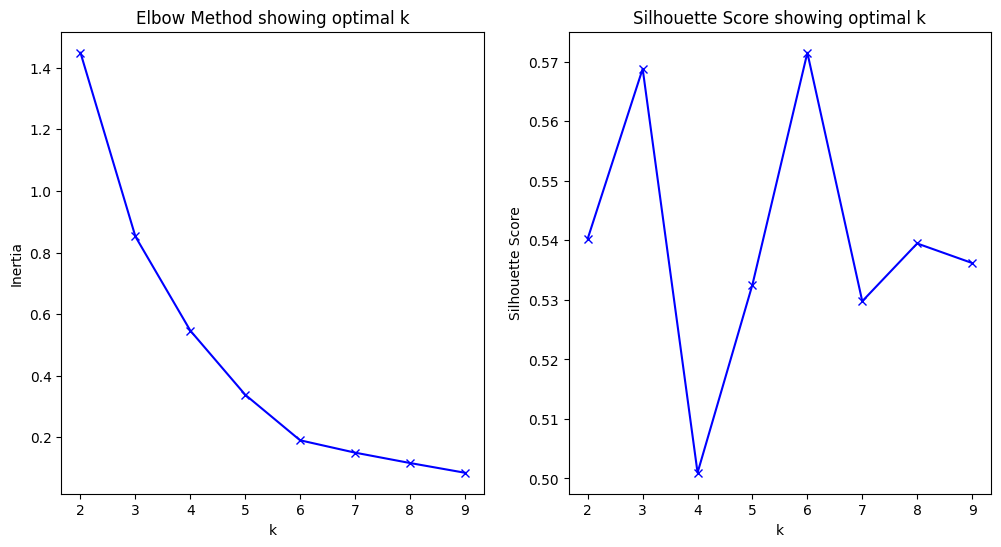

In [5]:
min_shots_threshold = 1000
filtered_df = df[df['shots_played'] >= min_shots_threshold]

inertia = []
silhouette_scores = []
K = range(2, 10) 

for k in K:
    if len(filtered_df) >= k:
        kmeans = KMeans(n_clusters=k, random_state=42).fit(filtered_df[['agg']])
        inertia.append(kmeans.inertia_)
        silhouette_scores.append(silhouette_score(filtered_df[['agg']], kmeans.labels_))

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('Elbow Method showing optimal k')

plt.subplot(1, 2, 2)
plt.plot(K, silhouette_scores, 'bx-')
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score showing optimal k')
plt.show()

In [6]:
optimal_clusters = 4

kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
filtered_df['cluster'] = kmeans.fit_predict(filtered_df[['agg']])

centroids = kmeans.cluster_centers_.flatten()
sorted_centroids = np.sort(centroids)

tier_names = {
    sorted_centroids[0]: 'Conservative Players',
    sorted_centroids[1]: 'Balanced Players',
    sorted_centroids[2]: 'Moderate Aggressors',
    sorted_centroids[3]: 'Ultra Aggressors' if optimal_clusters == 4 else 'High Aggressors',
}

filtered_df['tier'] = filtered_df['cluster'].map(lambda x: tier_names[kmeans.cluster_centers_.flatten()[x]])

final_df = filtered_df[['hitting_player', 'agg', 'shots_played', 'tier']]

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/tmp/ipykernel_17/1920368051.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['cluster'] = kmeans.fit_predict(filtered_df[['agg']])
/tmp/ipykernel_17/1920368051.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['tier'] = filtered_df['cluster'].map(l

In [7]:
final_df
final_df.to_csv('tiered_agg.csv', index=False)  